In [2]:
import pandas as pa
import matplotlib.pyplot as pp
import numpy as np

In [29]:
x1 = pa.read_csv("G:\Coding Blocks\Documents\linearX.csv")
y1 = pa.read_csv("G:\Coding Blocks\Documents\linearY.csv")
x = x1.values
y = y1.values
print("shape of x is {0}".format(x.shape))
print("shape of y is {0}".format(y.shape))

shape of x is (99, 1)
shape of y is (99, 1)


In [30]:
print("First 5 values of x")
print(x1.head(5))
print("===================================")
print("First 5 values of y")
print(y1.head(5))

First 5 values of x


AttributeError: 'numpy.ndarray' object has no attribute 'head'

scatter plot without normalization of data


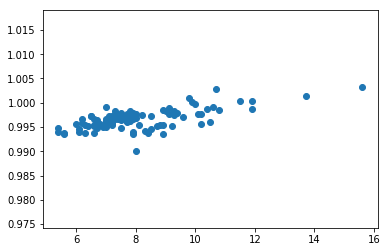

In [31]:
print("scatter plot without normalization of data")
pp.scatter(x,y)
pp.show()

In [33]:
print("normalizing the data:")
print("===================================")
x = (x -  x.mean())/x.std()
print(x1.head(5))

normalizing the data:
   9.1
0  8.0
1  9.1
2  8.4
3  6.9
4  7.7


Scatter plot for normalized data :


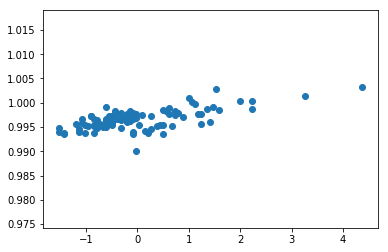

In [34]:
print("Scatter plot for normalized data :")
print("====================================")
pp.scatter(x,y)
pp.show()

# Designing algo for linear regression

[0.99660749 0.0013579 ]


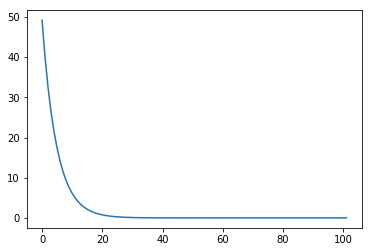

In [53]:
def hypothesis(a,theta):
    return theta[0] + theta[1]*a

def error(x,y,theta):
    err = 0
    m =  y.shape[0]
    for i in range(m):
        h = hypothesis(x[i],theta)
        e = (y[i] - h)**2
        err += e
    return err/2

def gradient(x,y,theta):  ##calculating slope
    grad = np.zeros((2,))
    m =  y.shape[0]
    for i in range(m):
        h = hypothesis(x[i],theta)
        grad[0] += (y[i] - h)
        grad[1] += (y[i] - h)*x[i]
    return grad

def gradientDes(x,y,learning_rate = 0.001):
    itr = 0
    theta = np.zeros((2,))  ## important
    e = error(x,y,theta)
    errorList = [e]
    while itr<=100 :
        m =  gradient(x,y,theta)
        theta[0] = theta[0] + learning_rate*m[0]
        theta[1] = theta[1] + learning_rate*m[1]
        ne = error(x,y,theta)
        errorList.append(ne)
        itr += 1
    return theta,errorList

finalT,errorList = gradientDes(x,y)
print(finalT)
pp.plot(errorList)

        

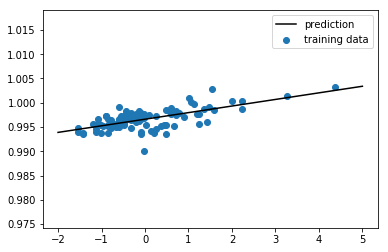

In [54]:
def drawline(theta):
    x_pts = np.linspace(-2,5,10)
    y_pts = hypothesis(x_pts,finalT)
    pp.scatter(x,y,label="training data")
    pp.plot(x_pts,y_pts,color="black",label ="prediction")
    pp.legend()
    pp.show()
drawline(finalT)